## ニューラルネットワーク

## MNISTデータセット  

In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

### 平滑化

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### 画像データの可視化

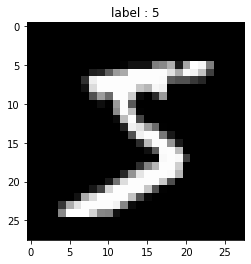

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

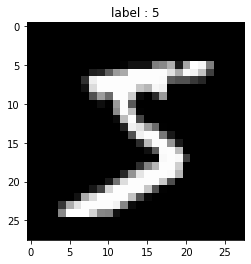

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

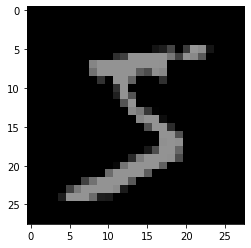

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

### 前処理  
>画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


### one-hot表現 に変換

>また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には one-hot表現 に変換します。  
>scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。



In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


### train_test_split

>さらに、訓練データ6万枚の内2割を検証データとして分割してください。  
>訓練データが48000枚、検証データが12000枚となります。

In [10]:
from sklearn.model_selection import train_test_split

学習で使用するため、正解データは ワンホットエンコーディングした y_train_one_hot を使用。

In [11]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train.shape)
print(y_val.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


精度の計算用に y_val をデコードする。

In [12]:
y_test_decode = np.argmax(y_val, axis=1)
print(y_test_decode.shape)
print(y_test_decode)

(12000,)
[7 6 9 ... 0 9 5]


## ニューラルネットワークスクラッチ

>ニューラルネットワークのクラスをスクラッチで作成していきます。  
>NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。
>
>今回は多クラス分類を行う**3層のニューラルネットワーク**を作成します。  
>層の数などは固定した上でニューラルネットワークの基本を学びます。  
>次のSprintで層を自由に変えられる設計にしていきます。
>
>以下に雛形を用意してあります。  
>このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。

In [13]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, function = 'tanh', verbose = True):
        self.activation_function = function
        self.verbose = verbose
        self.L_list_every_batch = []
        self.L_list_every_batch_val = []
    
    
    def fit(self, X, y, iteration = 10, alpha = 0.01, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
            
        #　重みとバイアスの初期化
        self.initial_value()
        
        # 損失関数を入れるリスト
        L_list = []
        L_list_val = []
        
        for _ in range(iteration):
            # ミニバッチ
            get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
            #print(len(get_mini_batch)) # 2400
            #print(get_mini_batch[5]) # 5番目のミニバッチが取得できる

            for mini_X_train, mini_y_train in get_mini_batch:
                # このfor文内でミニバッチが使える
                self.forward(mini_X_train, mini_y_train, )
                self.backward(mini_X_train, mini_y_train, alpha = alpha)#10e-7

            # テストデータの損失関数計算用
            if X_val is not None and y_val is not None:
                get_mini_batch_val = GetMiniBatch(X_val, y_val, batch_size=20)
                for mini_X_val, mini_y_val in get_mini_batch_val:
                    self.test_forward(mini_X_val, mini_y_val)
                #mini_X_val, mini_y_val = get_mini_batch_val[-1]
                #self.test_forward(mini_X_val, mini_y_val)
                    
            # エポックごとに保管
            L_list.append(self.L)
            L_list_val.append(self.L_val)
        
        # 繰り返しが終わったらリストを保管    
        self.L_list = np.array(L_list) 
        self.L_list_val = np.array(L_list_val)
        
        
    def initial_value(self,):
        """
        initial value
        """
        # 【問題1】
        batch_size = 20 # バッチサイズ
        n_features = 784 # 特徴量の数
        n_nodes1 = 400 # 1層目のノード数
        n_nodes2 = 200 # 2層目のノード数
        n_output = 10 # 出力のクラス数（3層目のノード数）

        sigma = 0.01 # ガウス分布の標準偏差
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        # W1: (784, 400)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        # W2: (400, 200)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        # W3: (200, 10)
        self.B1 = sigma * np.random.randn(n_nodes1, )
        # B1: (400, )
        self.B2 = sigma * np.random.randn(n_nodes2, )
        # B2: (200, )
        self.B3 = sigma * np.random.randn(n_output, )
        # B3: (10, )
        
        
        
    def forward(self, X, y, X_val=None, y_val=None):
        """
        フォワード

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 【問題2】
        A1 = X@self.W1+self.B1.reshape(-1,1).T
        
        if self.activation_function == 'sigmoid':
            # 活性化関数(sigmoid)
            Z1 = 1/(1+np.exp(-A1))
        else:
            # 活性化関数(ハイパボリックタンジェント関数)
            Z1= np.tanh(A1)
        
        A2 = Z1@self.W2+self.B2.reshape(-1,1).T
        
        if self.activation_function == 'sigmoid':
            # 活性化関数(sigmoid)
            Z2 = 1/(1+np.exp(-A2))
        else:
            # 活性化関数(ハイパボリックタンジェント関数)
            Z2= np.tanh(A2)
        
        A3 = Z2@self.W3+self.B3.reshape(-1,1).T
        
        # 活性化関数(ソフトマックス関数)
        Z3 = np.exp(A3)/(np.sum(np.exp(A3), axis=1).reshape(-1,1))
        
        
        # 【問題3】目的関数（損失関数）
        # 交差エントロピー誤差
        # 行列それぞれ掛けて全部足す？
        nb = y.shape[0]#バッチサイズ
        L = -(1/nb)*(np.sum(y*np.log(Z3)))
        
        # fit関数からエポックごとに呼び出して保管したいため、クラス変数として保管
        self.L = L
        # ミニバッチごとに保管
        #self.L_list_every_batch.append(L)
        
        
        # 保管
        self.A1= A1
        self.A2= A2
        self.A3= A3
        
        self.Z1= Z1
        self.Z2= Z2
        self.Z3= Z3
        
        
    def test_forward(self, X_val, y_val):
        """
        テストデータ損失関数

        Parameters
        ----------
        """
        A1_val = X_val@self.W1+self.B1.reshape(-1,1).T
        
        if self.activation_function == 'sigmoid':
            Z1_val = 1/(1+np.exp(-A1_val))
        else:
            Z1_val= np.tanh(A1_val)
        
        A2_val = Z1_val@self.W2+self.B2.reshape(-1,1).T
        
        if self.activation_function == 'sigmoid':
            Z2_val = 1/(1+np.exp(-A2_val))
        else:
            Z2_val= np.tanh(A2_val)
        
        A3_val = Z2_val@self.W3+self.B3.reshape(-1,1).T
        
        Z3_val = np.exp(A3_val)/(np.sum(np.exp(A3_val), axis=1).reshape(-1,1))
        
        # 【問題3】目的関数（損失関数）
        nb_val = y_val.shape[0]#バッチサイズ
        L_val = -(1/nb_val)*(np.sum(y_val*np.log(Z3_val)))
        
        # fit関数からエポックごとに呼び出して保管したいため、クラス変数として保管
        self.L_val = L_val
        # ミニバッチごとに保管
        #self.L_list_every_batch_val.append(L_val)
        

        
    def backward(self, X, y, alpha, X_val=None, y_val=None):
        """
        バックワード

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 第３層
        dL_dA3 = self.Z3 - y
        dL_dB3 = np.sum(dL_dA3, axis=0)#バッチサイズ分の合計
        dL_dW3 = self.Z2.T@dL_dA3
        dL_dZ2 = dL_dA3@self.W3.T
        
        self.W3 = self.W3 - alpha*(dL_dW3)
        self.B3 = self.B3 - alpha*(dL_dB3)
        
        # 第２層
        if self.activation_function == 'sigmoid':
            # シグモイド
            sigmoid_A2 = 1/(1+np.exp(-self.A2))
            dL_dA2 = dL_dZ2*(1 - sigmoid_A2)*sigmoid_A2 
        else:
            # ハイパボリックタンジェント
            dL_dA2 = dL_dZ2*(1 - np.tanh(self.A2))
        
        dL_dB2 = np.sum(dL_dA2, axis=0)#バッチサイズ分の合計
        dL_dW2 = self.Z1.T@dL_dA2
        dL_dZ1 = dL_dA2@self.W2.T
        
        self.W2 = self.W2 - alpha*(dL_dW2)
        self.B2 = self.B2 - alpha*(dL_dB2)
    
    
        # 第1層
        if self.activation_function == 'sigmoid':
            # シグモイド
            sigmoid_A1 = 1/(1+np.exp(-self.A1))
            dL_dA1 = dL_dZ1*(1 - sigmoid_A1)*sigmoid_A1
        else:
            # ハイパボリックタンジェント
            dL_dA1 = dL_dZ1*(1 - np.tanh(self.A1))
        
        dL_dB1 = np.sum(dL_dA1, axis=0)#バッチサイズ分の合計
        dL_dW1 = X.T@dL_dA1
    
        self.W1 = self.W1 - alpha*(dL_dW1)
        self.B1 = self.B1 - alpha*(dL_dB1)
        
    
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        # サイズ
        b = X.shape[0]
        # ラベル
        k = X.shape[1]
        
        A1 = X@self.W1+self.B1.reshape(-1,1).T
        
        if self.activation_function == 'sigmoid':
            # 活性化関数(sigmoid)
            Z1 = 1/(1+np.exp(-A1))
        else:
            # 活性化関数(ハイパボリックタンジェント関数)
            Z1= np.tanh(A1)

        A2 = Z1@self.W2+self.B2.reshape(-1,1).T

        if self.activation_function == 'sigmoid':
            # 活性化関数(sigmoid)
            Z2 = 1/(1+np.exp(-A2))
        else:
            # 活性化関数(ハイパボリックタンジェント関数)
            Z2= np.tanh(A2)
        
        A3 = Z2@self.W3+self.B3.reshape(-1,1).T

        # 活性化関数(ソフトマックス関数)
        #Z3 は各ラベル（0〜9）に対する確率の配列
        Z3 = np.exp(A3)/(np.sum(np.exp(A3), axis=1).reshape(-1,1))
        
        # 出力された確率のなかで最も大きい値のインデックスを取得
        pred = np.argmax(Z3, axis=1)
        
        return pred
    

### ミニバッチ処理  
>これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。  
>しかし、ニューラルネットワークではデータを分割して入力する **確率的勾配降下法** が一般的です。  
>分割した際のひとかたまりを **ミニバッチ** 、そのサンプル数を **バッチサイズ** と呼びます。
>
>今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、  
>48000÷20で2400回の更新を繰り返すことになります。  
>ニューラルネットワークではこれを2400回 **イテレーション**（iteration） すると呼びます。 > 
>訓練データを一度全て見ると1回の **エポック**（epoch） が終わったことになります。  
>このエポックを複数回繰り返し、学習が完了します。
>
>これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [14]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

>このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [15]:
#get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
#print(len(get_mini_batch)) # 2400
#print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
#for mini_X_train, mini_y_train in get_mini_batch:
#    # このfor文内でミニバッチが使える
    
#    pass

## 【問題1】重みの初期値を決めるコードの作成  
>ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。
>
>
>重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。
>
>以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

ScratchSimpleNeuralNetrowkClassifier()クラス内に　initial_value　メソッドを作成。

In [16]:
neural_netrowk = ScratchSimpleNeuralNetrowkClassifier()
neural_netrowk.initial_value()

## 【問題2】フォワードプロパゲーションの実装

ScratchSimpleNeuralNetrowkClassifier()クラス内に　forward　メソッドを作成。

In [17]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
mini_X_train, mini_y_train = get_mini_batch[0]

# ミニバッチ１個分の処理
neural_netrowk.forward(mini_X_train, mini_y_train, X_val=None, y_val=None)

## 【問題3】交差エントロピー誤差の実装  
>目的関数（損失関数）を作成します。
>
>多クラス分類の目的関数である交差エントロピー誤差 Lは次の数式です。
>
>$
L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})
$
>
>yij  : j 番目のサンプルの k 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）
>
>z3ij : j 番目のサンプルの k 番目のクラスの確率（スカラー）
>
>nb : バッチサイズ、batch_size
>
>nc : クラスの数、n_output（今回のMNISTでは10）
>
>サンプル1つあたりの誤差が求まります。

上記、forward　メソッド内に作成。

In [18]:
# 同上

## 【問題4】バックプロパゲーションの実装  
>三層のニューラルネットワークのバックプロパゲーションを作成してください。  
>確率的勾配降下法を行う部分です。



ScratchSimpleNeuralNetrowkClassifier()クラス内に　backward　メソッドを作成。

In [19]:
#  ミニバッチ１個分の処理
neural_netrowk.backward(mini_X_train, mini_y_train, alpha = 0.01, X_val=None, y_val=None)

## 【問題5】推定  
>推定を行うメソッドを作成してください。
>
>フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。
>
>numpy.argmax — NumPy v1.17 Manual

ScratchSimpleNeuralNetrowkClassifier()クラス内に　predict　メソッドを作成。

In [20]:
#  ミニバッチ１個分
y_pred = neural_netrowk.predict(X_val)
#np.set_printoptions(threshold=np.inf)

print(y_pred)

[4 4 4 ... 4 4 4]


## 【問題6】学習と推定  
>MNISTのデータを学習・推定し、Accuracyを計算してください。

学習  
fitメソッド内にミニバッチ処理を実装。for文でループさせる。

In [53]:
neural_netrowk_q6 = ScratchSimpleNeuralNetrowkClassifier(function = 'tanh')#sigmoid
neural_netrowk_q6.fit(X_train, y_train, iteration=25, alpha = 0.0001, X_val=X_val, y_val=y_val)


推測

In [54]:
y_pred_q6 = neural_netrowk_q6.predict(X_val)
#np.set_printoptions(threshold=np.inf)

print(y_pred_q6)

[7 6 9 ... 0 9 5]


正解ラベル  
ワンホットエンコーディングしたラベル y_test を、np.argmax を使ってdecode したもの。

In [55]:
print(y_test_decode)

[7 6 9 ... 0 9 5]


精度を計算。

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_decode, y_pred_q6)

0.7686666666666667

## 【問題7】学習曲線のプロット  
>学習曲線をプロットしてください。
>
>ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。  
>訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

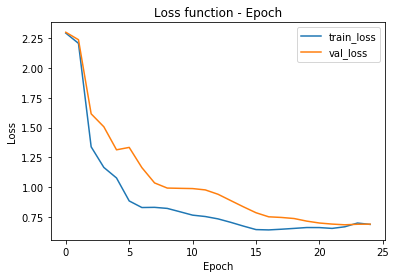

In [58]:
# エポックごと
loss_function_epoch = neural_netrowk_q6.L_list
loss_function_epoch_val = neural_netrowk_q6.L_list_val
plt.title('Loss function - Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss_function_epoch, label='train_loss')#, color='b'
plt.plot(loss_function_epoch_val, label='val_loss')# color='b'
plt.legend(loc='best')

## 【問題8】（アドバンス課題）誤分類の確認 
>誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

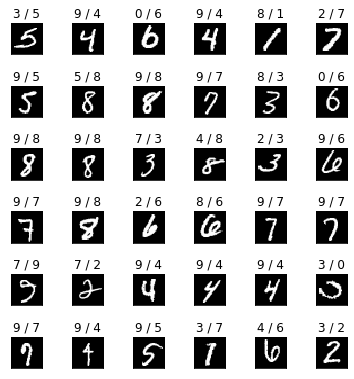

In [59]:
#以下の通り変更
#y_pred=y_pred_q6_q6
#y_val=y_test_decode
#X_val=X_val

"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred_q6 : 推定値のndarray (n_samples,)
y_test_decode : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか
true_false = y_pred_q6==y_test_decode
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred_q6[false_list[i]],y_test_decode[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

以上